In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Dataset/store-dataset.csv", encoding='latin1')

In [2]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["YearMonth"] = df["Order Date"].dt.to_period('M')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [106]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


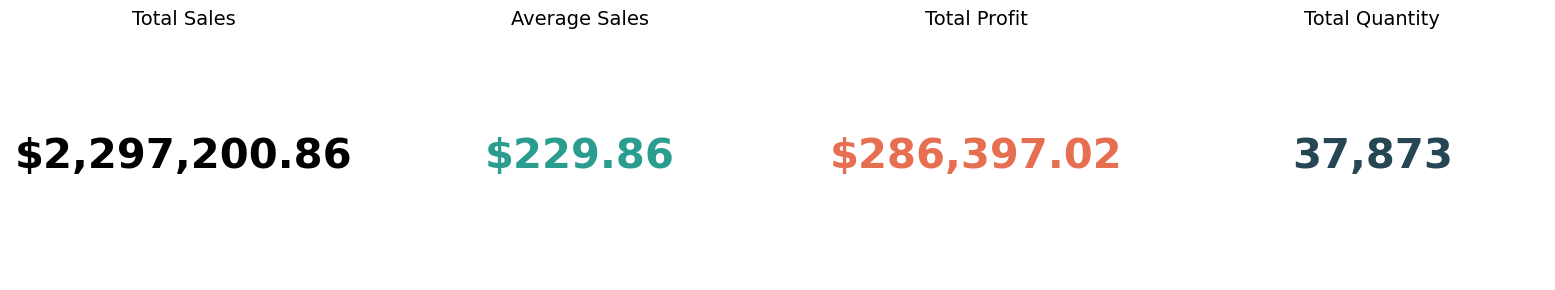

In [ ]:

Total_Sales = df["Sales"].sum()
Average_Sales = df["Sales"].mean()
Total_Profit = df["Profit"].sum()
Total_Quantity = df["Quantity"].sum()


fig, axes = plt.subplots(1, 4, figsize=(16,3))  # 1 صف و4 أعمدة

# Card 1: Total Sales
axes[0].text(0.5, 0.5, f"${Total_Sales:,.2f}", fontsize=30, fontweight='bold', ha='center', va='center')
axes[0].set_title("Total Sales", fontsize=14)
axes[0].axis('off')

# Card 2: Average Sales
axes[1].text(0.5, 0.5, f"${Average_Sales:,.2f}", fontsize=30, fontweight='bold', ha='center', va='center', color='#2a9d8f')
axes[1].set_title("Average Sales", fontsize=14)
axes[1].axis('off')

# Card 3: Total Profit
axes[2].text(0.5, 0.5, f"${Total_Profit:,.2f}", fontsize=30, fontweight='bold', ha='center', va='center', color='#e76f51')
axes[2].set_title("Total Profit", fontsize=14)
axes[2].axis('off')

# Card 4: Total Quantity
axes[3].text(0.5, 0.5, f"{Total_Quantity:,}", fontsize=30, fontweight='bold', ha='center', va='center', color='#264653')
axes[3].set_title("Total Quantity", fontsize=14)
axes[3].axis('off')

plt.tight_layout()
plt.show()

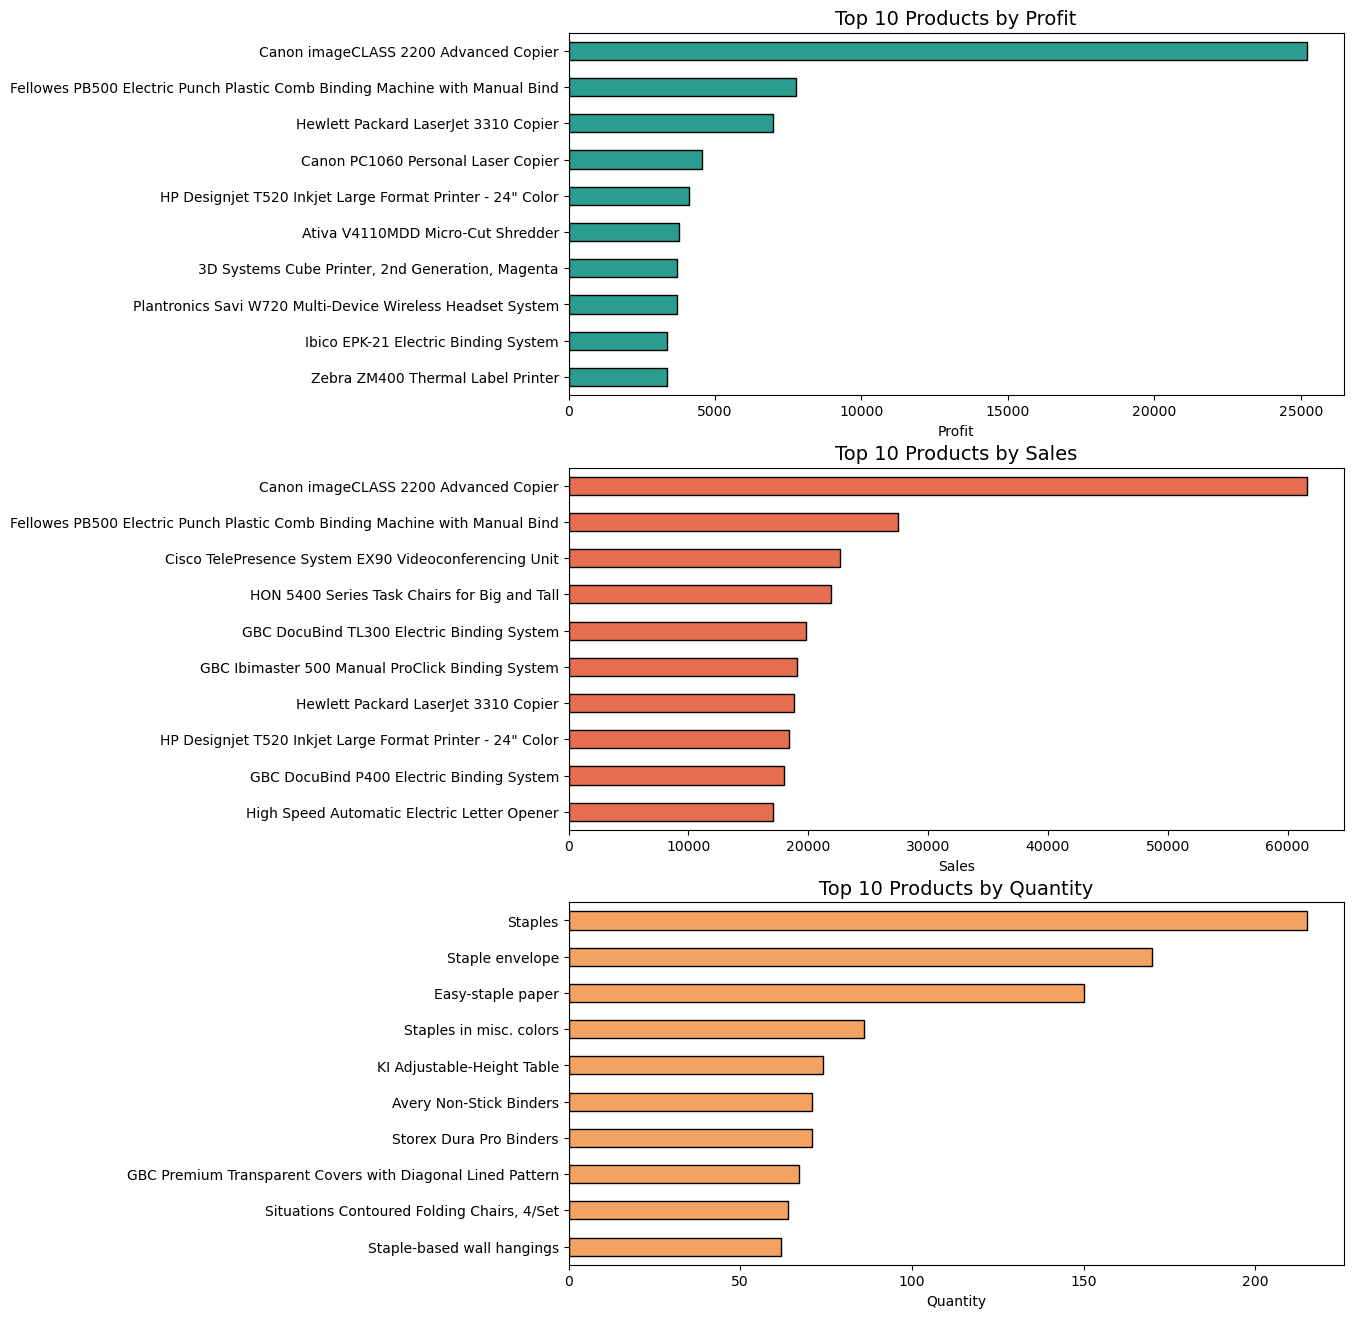

In [93]:
# أعلى 10 منتجات حسب الربح
top_product_profit = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

# أعلى 10 منتجات حسب المبيعات
top_product_sales = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

# أعلى 10 منتجات حسب الكمية
top_product_quantity = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)

# إنشاء figure مع 3 صفوف و1 عمود
fig, axes = plt.subplots(3, 1, figsize=(10,16))  # 3 صفوف و1 عمود

# Chart 1: Top 10 Products by Profit
top_product_profit.plot(kind="barh", ax=axes[0], color="#2a9d8f", edgecolor="black")
axes[0].set_title("Top 10 Products by Profit", fontsize=14)
axes[0].set_xlabel("Profit")
axes[0].set_ylabel("")
axes[0].invert_yaxis()  # أعلى قيمة فوق

# Chart 2: Top 10 Products by Sales
top_product_sales.plot(kind="barh", ax=axes[1], color="#e76f51", edgecolor="black")
axes[1].set_title("Top 10 Products by Sales", fontsize=14)
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("")
axes[1].invert_yaxis()

# Chart 3: Top 10 Products by Quantity
top_product_quantity.plot(kind="barh", ax=axes[2], color="#f4a261", edgecolor="black")
axes[2].set_title("Top 10 Products by Quantity", fontsize=14)
axes[2].set_xlabel("Quantity")
axes[2].set_ylabel("")
axes[2].invert_yaxis()

plt.show()

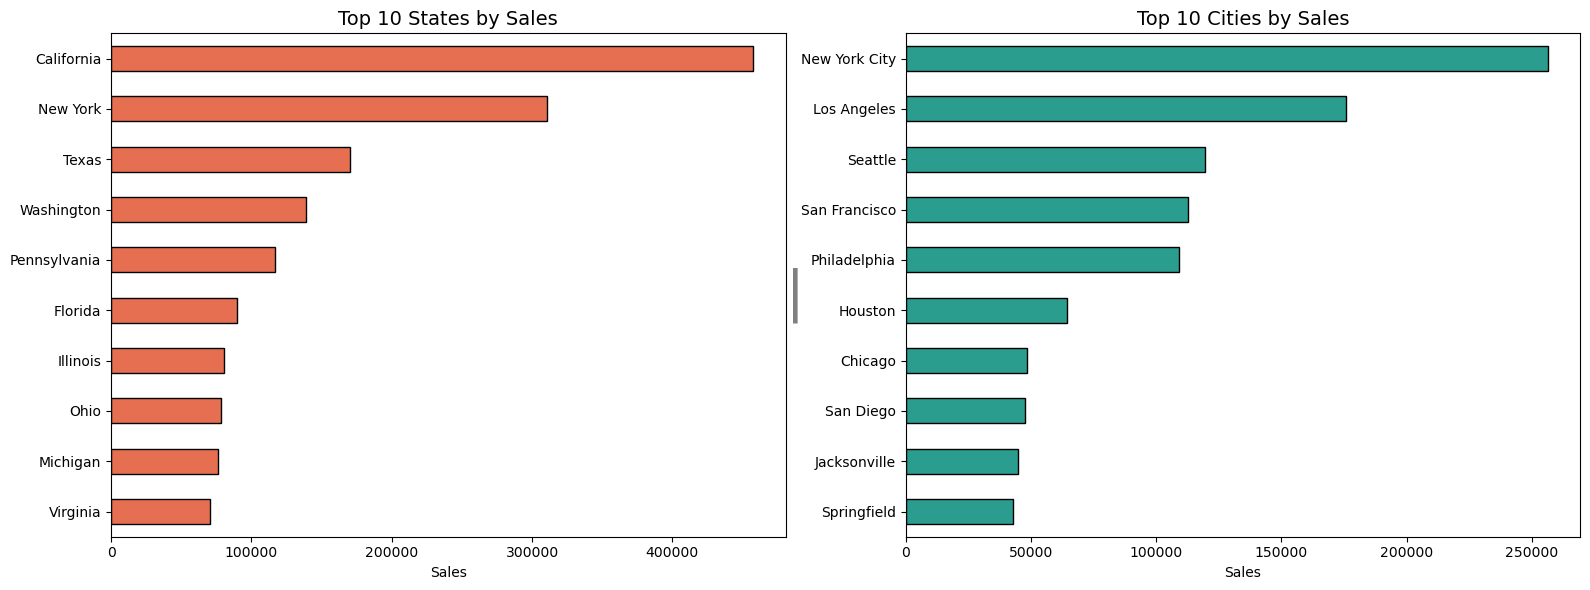

In [101]:
# Top 10 States by Sales
top_states_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

# Top 10 Cities by Sales
top_cities_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

# إنشاء figure مع 1 صف و2 عمود
fig, axes = plt.subplots(1, 2, figsize=(16,6))  # 1 صف و2 عمود

# Chart 1: Top 10 States by Sales
top_states_sales.plot(kind="barh", ax=axes[0], color="#e76f51", edgecolor="black")
axes[0].set_title("Top 10 States by Sales", fontsize=14)
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("")
axes[0].invert_yaxis()  # أعلى قيمة فوق

# Chart 2: Top 10 Cities by Sales
top_cities_sales.plot(kind="barh", ax=axes[1], color="#2a9d8f", edgecolor="black")
axes[1].set_title("Top 10 Cities by Sales", fontsize=14)
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("")
axes[1].invert_yaxis()
# إضافة خط فاصل في منتصف الشكل
fig.subplots_adjust(wspace=0.3)  # المسافة بين الـ subplots
fig.text(0.5, 0.5, '|', fontsize=40, color='grey', ha='center', va='center')  # خط نصفي


plt.tight_layout()
plt.show()


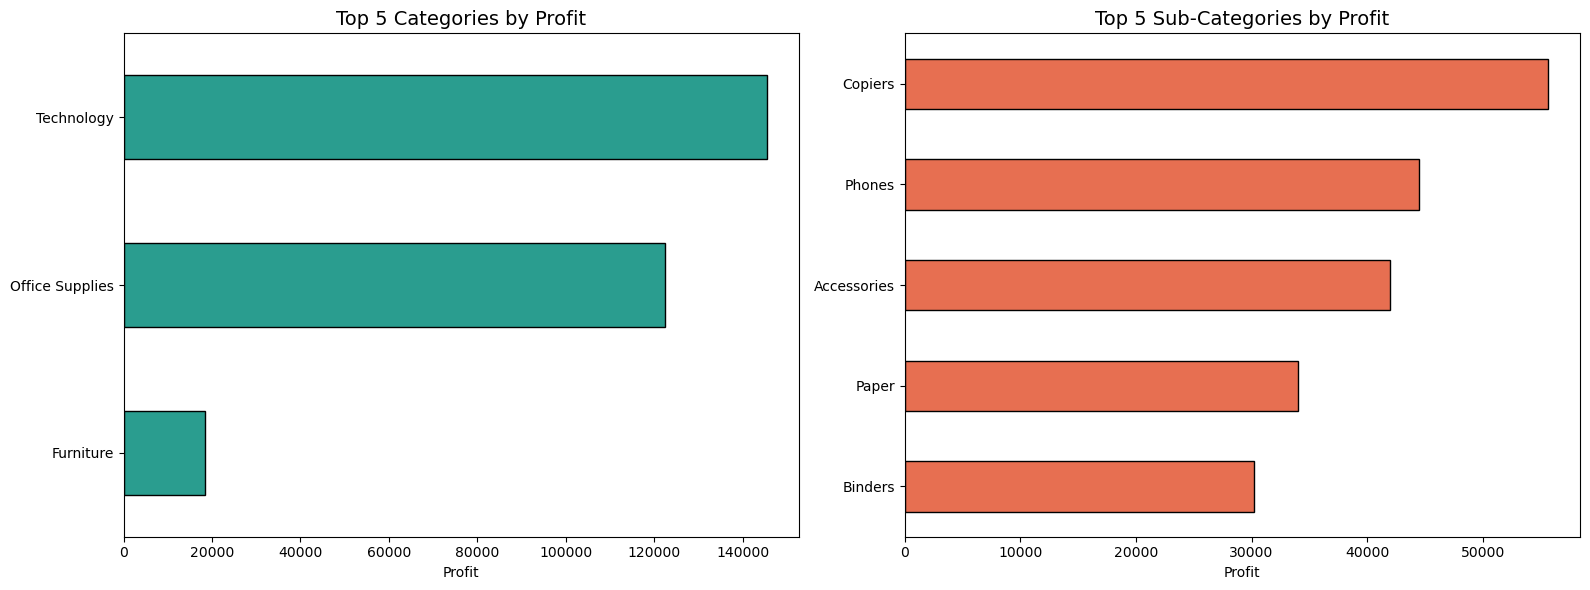

In [103]:
# Top 5 Categories by Profit
top_category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False).head(5)

# Top 5 Sub-Categories by Profit
top_subcategory_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(5)

# إنشاء figure مع 2 صف و1 عمود
fig, axes = plt.subplots(1, 2, figsize=(16,6))  # 2 صفوف و1 عمود

# Chart 1: Top 5 Categories by Profit
top_category_profit.plot(kind="barh", ax=axes[0], color="#2a9d8f", edgecolor="black")
axes[0].set_title("Top 5 Categories by Profit", fontsize=14)
axes[0].set_xlabel("Profit")
axes[0].set_ylabel("")
axes[0].invert_yaxis()  # أعلى قيمة فوق

# Chart 2: Top 5 Sub-Categories by Profit
top_subcategory_profit.plot(kind="barh", ax=axes[1], color="#e76f51", edgecolor="black")
axes[1].set_title("Top 5 Sub-Categories by Profit", fontsize=14)
axes[1].set_xlabel("Profit")
axes[1].set_ylabel("")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


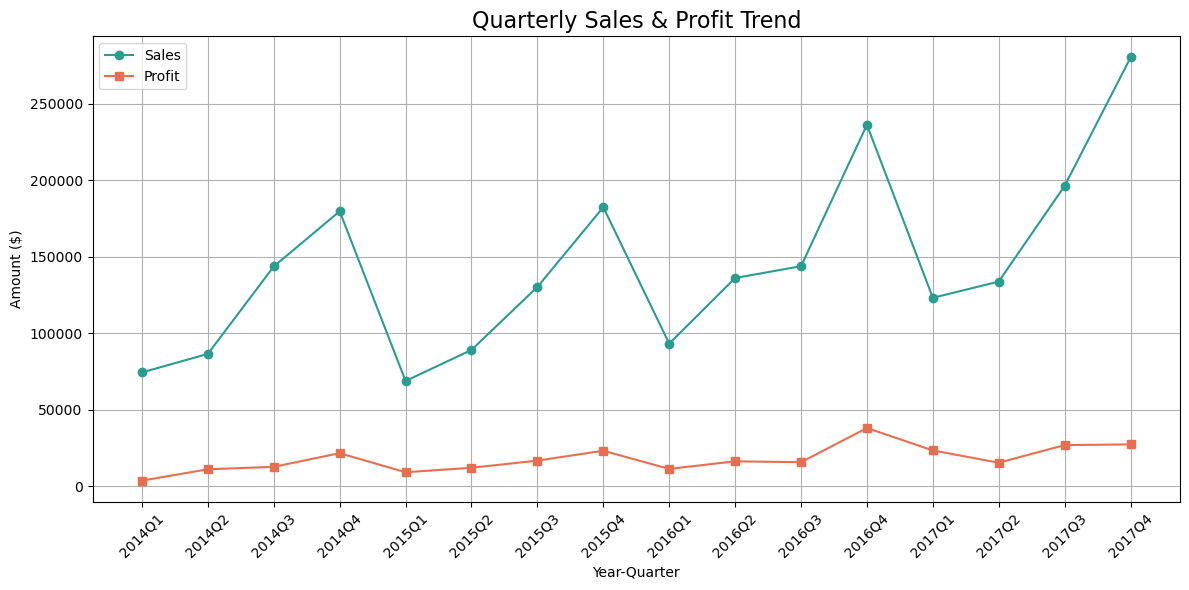

In [132]:
# إنشاء عمود للربع والسنة
df["YearQuarter"] = df["Order Date"].dt.to_period('Q')  # مثل 2017Q1

# تجميع المبيعات والأرباح لكل ربع
quarterly_sales = df.groupby("YearQuarter")["Sales"].sum()
quarterly_profit = df.groupby("YearQuarter")["Profit"].sum()

# رسم Line Chart
plt.figure(figsize=(12,6))

# خط المبيعات
plt.plot(quarterly_sales.index.astype(str), quarterly_sales.values, marker='o', color='#2a9d8f', label='Sales')

# خط الأرباح
plt.plot(quarterly_profit.index.astype(str), quarterly_profit.values, marker='s', color='#e76f51', label='Profit')

plt.title("Quarterly Sales & Profit Trend", fontsize=16)
plt.xlabel("Year-Quarter")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

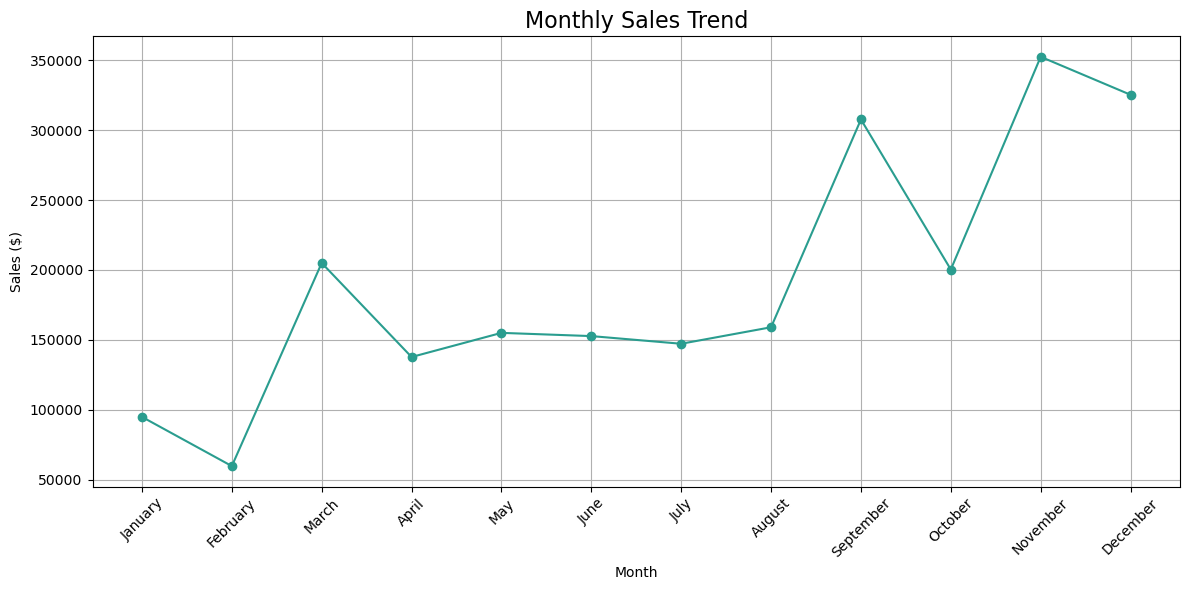

In [133]:
# استخراج اسم الشهر
df["Month"] = df["Order Date"].dt.month_name()

# تجميع المبيعات حسب الشهر
monthly_sales = df.groupby("Month")["Sales"].sum()

# ترتيب الأشهر حسب الترتيب الزمني
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
monthly_sales = monthly_sales.reindex(month_order)

# رسم Line Chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='#2a9d8f')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

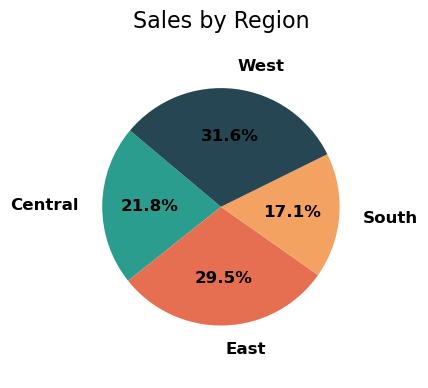

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# تجميع المبيعات حسب Region
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(
    region_sales, 
    labels=region_sales.index,        # Labels فوق Pie
    autopct='%1.1f%%',                # النسب داخل Pie
    startangle=140,
    colors=['#2a9d8f','#e76f51','#f4a261','#264653'],
    textprops={'color':'black', 'fontsize':12, 'fontweight':'bold'},
    labeldistance=1.2,
    pctdistance=0.6     # المسافة من مركز الدائرة للنسب داخل الـ slices
)

# تعديل لون الـ labels للأسود


plt.title("Sales by Region", fontsize=16)
plt.tight_layout()
plt.axis('equal')  # لضمان الشكل الدائري
plt.show()

## Key Insights from E-Commerce Sales Analysis

### 1. Best States for Sales
- **California**, **New York**, and **Texas** are the top-performing states in terms of total sales.
- These regions should be prioritized for marketing campaigns and inventory allocation.

### 2. Most Profitable Sub-Categories
- **Copiers** and **Phones** generate the highest profit margins.
- Focusing on promoting these products can significantly increase overall profitability.

### 3. Top Selling Products
- **Staples** and **Binders** are the most frequently sold products.
- Maintaining sufficient stock levels for these items is crucial to meet customer demand.

### 4. Best Months to Sell
- **November** and **December** show the highest sales volume.
- Seasonal promotions and marketing efforts should be concentrated during these months to maximize revenue.
